# 🚀 Startup Deal Evaluator - ML-Powered Investment Analysis

## Overview
This comprehensive Jupyter notebook helps investment firms evaluate startup deals using machine learning. The application provides:
- **Data-driven insights** from startup funding datasets
- **Predictive modeling** for startup success probability
- **Interactive dashboard** for real-time deal evaluation
- **Risk assessment** and feature importance analysis

## Features
✅ **Data Loading**: Import from Kaggle datasets or Crunchbase API  
✅ **Data Preprocessing**: Clean, encode, and scale features  
✅ **ML Models**: Random Forest for success prediction and funding estimation  
✅ **Interactive UI**: User-friendly interface for deal input  
✅ **Visualizations**: Industry analysis and feature importance charts  
✅ **Deal Scoring**: Real-time attractiveness scoring with confidence metrics  

## Requirements
- pandas, scikit-learn, matplotlib, seaborn
- ipywidgets for interactive components
- Internet connection for dataset download (optional)

---

## 📦 Section A: Environment Setup and Dependencies

First, let's install and import all required libraries for our startup deal evaluation system.

In [23]:
# Install required packages (run this cell first if packages are not installed)
import subprocess
import sys

def install_package(package):
    """Install a package using pip if not already installed"""
    try:
        __import__(package)
        print(f"✅ {package} is already installed")
    except ImportError:
        print(f"🔄 Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ {package} installed successfully")

# List of required packages
required_packages = [
    'pandas', 'numpy', 'scikit-learn', 'matplotlib', 'seaborn', 
    'ipywidgets', 'requests', 'kaggle'
]

print("🚀 Setting up environment for Startup Deal Evaluator...")
for package in required_packages:
    install_package(package)

print("\n🎉 Environment setup complete!")

🚀 Setting up environment for Startup Deal Evaluator...
✅ pandas is already installed
✅ numpy is already installed
🔄 Installing scikit-learn...
✅ scikit-learn installed successfully
✅ matplotlib is already installed
✅ seaborn is already installed
✅ ipywidgets is already installed
✅ requests is already installed


OSError: Could not find kaggle.json. Make sure it's located in C:\Users\jamie\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

In [ ]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
import requests
import json
import os

# Machine Learning imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           precision_score, recall_score, f1_score, roc_auc_score,
                           mean_squared_error, mean_absolute_error, r2_score)
from sklearn.impute import SimpleImputer

# Interactive widgets
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("🎯 All libraries imported successfully!")
print("📊 Visualization style configured")
print("🔀 Random seed set for reproducibility")

🎯 All libraries imported successfully!
📊 Visualization style configured
🔀 Random seed set for reproducibility


## 📁 Section B: Data Loading and Import

This section handles data loading from multiple sources:
1. **Kaggle Datasets**: Download startup investment data
2. **Synthetic Data**: Generate realistic sample data as fallback
3. **API Integration**: Connect to external data sources

**Note**: For Kaggle API access, you need to:
1. Create a Kaggle account and generate API token
2. Place `kaggle.json` in your `~/.kaggle/` directory
3. Or use the synthetic data generator below

In [ ]:
def generate_synthetic_startup_data(n_samples=1000):
    """
    Generate realistic synthetic startup data for demonstration purposes.
    This mimics the structure of real startup funding datasets.
    """
    np.random.seed(42)
    
    # Define realistic categories
    industries = ['Fintech', 'Healthcare', 'E-commerce', 'SaaS', 'AI/ML', 'Biotech', 
                 'EdTech', 'Gaming', 'Cybersecurity', 'IoT', 'Blockchain', 'Marketing']
    
    locations = ['San Francisco', 'New York', 'London', 'Singapore', 'Boston', 
                'Los Angeles', 'Seattle', 'Austin', 'Berlin', 'Toronto', 'Sydney', 'Tel Aviv']
    
    funding_rounds = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D+']
    
    statuses = ['Operating', 'Acquired', 'IPO', 'Closed']
    
    # Generate synthetic data
    data = []
    for i in range(n_samples):
        # Company basics
        company_id = f"startup_{i+1:04d}"
        company_name = f"Company_{i+1}"
        industry = np.random.choice(industries)
        location = np.random.choice(locations)
        
        # Funding details
        funding_round = np.random.choice(funding_rounds)
        
        # Funding amounts based on round (realistic ranges)
        funding_multipliers = {'Seed': (0.1, 2), 'Series A': (2, 15), 'Series B': (10, 50), 
                              'Series C': (25, 100), 'Series D+': (50, 500)}
        min_funding, max_funding = funding_multipliers[funding_round]
        funding_amount = np.random.uniform(min_funding, max_funding) * 1_000_000
        
        # Valuation (typically 10-20x funding amount)
        valuation_multiplier = np.random.uniform(8, 25)
        valuation = funding_amount * valuation_multiplier
        
        # Team size (correlated with funding round)
        round_team_sizes = {'Seed': (2, 15), 'Series A': (10, 50), 'Series B': (25, 100), 
                           'Series C': (50, 200), 'Series D+': (100, 500)}
        min_team, max_team = round_team_sizes[funding_round]
        team_size = np.random.randint(min_team, max_team)
        
        # Years since founding
        years_since_founding = np.random.uniform(0.5, 10)
        
        # Revenue (some companies have revenue, others don't)
        has_revenue = np.random.choice([True, False], p=[0.7, 0.3])
        revenue = np.random.uniform(0.1, funding_amount/500_000) * 1_000_000 if has_revenue else 0
        
        # Number of investors
        num_investors = np.random.randint(1, 15)
        
        # Competition level (1-10 scale)
        competition_level = np.random.randint(1, 11)
        
        # Market size (billion USD)
        market_size = np.random.uniform(0.5, 100)
        
        # Determine success based on realistic factors
        success_probability = 0.5  # Base probability
        
        # Adjust based on factors
        if industry in ['Fintech', 'Healthcare', 'AI/ML', 'SaaS']:
            success_probability += 0.1
        if location in ['San Francisco', 'New York', 'Boston', 'Seattle']:
            success_probability += 0.1
        if team_size >= 20:
            success_probability += 0.1
        if revenue > 1_000_000:
            success_probability += 0.2
        if funding_round in ['Series B', 'Series C', 'Series D+']:
            success_probability += 0.1
        if competition_level <= 5:
            success_probability += 0.05
        
        # Ensure probability is between 0 and 1
        success_probability = np.clip(success_probability, 0.1, 0.9)
        
        # Determine status based on success probability
        is_successful = np.random.choice([True, False], p=[success_probability, 1-success_probability])
        if is_successful:
            status = np.random.choice(['Operating', 'Acquired', 'IPO'], p=[0.6, 0.3, 0.1])
        else:
            status = np.random.choice(['Operating', 'Closed'], p=[0.3, 0.7])
        
        # Binary success indicator (1 for Acquired/IPO, 0 for Closed, 0.5 for Operating)
        success_score = 1 if status in ['Acquired', 'IPO'] else (0.5 if status == 'Operating' else 0)
        
        data.append({
            'company_id': company_id,
            'company_name': company_name,
            'industry': industry,
            'location': location,
            'funding_round': funding_round,
            'funding_amount_usd': funding_amount,
            'valuation_usd': valuation,
            'team_size': team_size,
            'years_since_founding': years_since_founding,
            'revenue_usd': revenue,
            'num_investors': num_investors,
            'competition_level': competition_level,
            'market_size_billion_usd': market_size,
            'status': status,
            'success_score': success_score,
            'is_successful': 1 if status in ['Acquired', 'IPO'] else 0
        })
    
    return pd.DataFrame(data)

# Generate synthetic data
print("🔄 Generating synthetic startup dataset...")
df = generate_synthetic_startup_data(1000)
print(f"✅ Generated dataset with {len(df)} startup records")
print(f"📊 Dataset shape: {df.shape}")
print(f"🏢 Industries: {df['industry'].nunique()}")
print(f"🌍 Locations: {df['location'].nunique()}")
print(f"💰 Funding rounds: {df['funding_round'].nunique()}")

🔄 Generating synthetic startup dataset...
✅ Generated dataset with 1000 startup records
📊 Dataset shape: (1000, 16)
🏢 Industries: 12
🌍 Locations: 12
💰 Funding rounds: 5


In [ ]:
def load_kaggle_dataset():
    """
    Attempt to load startup dataset from Kaggle.
    Falls back to synthetic data if Kaggle access is not available.
    """
    try:
        # Try to load from Kaggle (requires API setup)
        import kaggle
        
        # Common startup datasets on Kaggle
        datasets = [
            'justinas/startup-investments',
            'arindam235/startup-investments-crunchbase',
            'yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase'
        ]
        
        for dataset in datasets:
            try:
                print(f"🔄 Attempting to download {dataset}...")
                kaggle.api.dataset_download_files(dataset, path='./data/', unzip=True)
                
                # Look for CSV files in the downloaded data
                import glob
                csv_files = glob.glob('./data/*.csv')
                if csv_files:
                    df = pd.read_csv(csv_files[0])
                    print(f"✅ Successfully loaded {dataset}")
                    print(f"📊 Dataset shape: {df.shape}")
                    return df, 'kaggle'
            except Exception as e:
                print(f"❌ Failed to load {dataset}: {str(e)}")
                continue
                
        print("⚠️ No Kaggle datasets could be loaded")
        return None, 'failed'
        
    except ImportError:
        print("⚠️ Kaggle API not available")
        return None, 'failed'

# Try to load real data, fallback to synthetic
try:
    real_data, source = load_kaggle_dataset()
    if real_data is not None:
        df = real_data
        print(f"🎉 Using real data from {source}")
    else:
        print("🔄 Using synthetic data for demonstration")
        print("📝 To use real data, set up Kaggle API credentials")
except Exception as e:
    print("⚠️ Kaggle API not configured - using synthetic data")
    print("📝 To use real data, set up Kaggle API credentials")
    print(f"   Error: {str(e)[:100]}...")

print(f"\n📋 Final dataset info:")
print(f"   Shape: {df.shape}")
print(f"   Columns: {list(df.columns)}")

OSError: Could not find kaggle.json. Make sure it's located in C:\Users\jamie\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

## 🔍 Section C: Data Exploration and Analysis

Let's explore our startup dataset to understand the data structure, distributions, and patterns.

In [ ]:
# Basic data exploration
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print()

print("📋 COLUMN INFORMATION")
print("=" * 50)
print(df.dtypes)
print()

print("📈 BASIC STATISTICS")
print("=" * 50)
print(df.describe())
print()

print("🔍 MISSING VALUES")
print("=" * 50)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
}).sort_values('Missing Percentage', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])
print()

print("🔢 UNIQUE VALUES COUNT")
print("=" * 50)
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count}")

print()
print("🎯 SAMPLE DATA")
print("=" * 50)
display(df.head())

📊 DATASET OVERVIEW
Dataset shape: (1000, 16)
Memory usage: 0.50 MB

📋 COLUMN INFORMATION
company_id                  object
company_name                object
industry                    object
location                    object
funding_round               object
funding_amount_usd         float64
valuation_usd              float64
team_size                    int64
years_since_founding       float64
revenue_usd                float64
num_investors                int64
competition_level            int64
market_size_billion_usd    float64
status                      object
success_score              float64
is_successful                int64
dtype: object

📈 BASIC STATISTICS
       funding_amount_usd  valuation_usd    team_size  years_since_founding  \
count        1.000000e+03   1.000000e+03  1000.000000           1000.000000   
mean         7.631028e+07   1.263602e+09   104.753000              5.275185   
std          1.199281e+08   2.136792e+09   118.213266              2.782306   
m

,company_id,company_name,industry,location,funding_round,funding_amount_usd,valuation_usd,team_size,years_since_founding,revenue_usd,num_investors,competition_level,market_size_billion_usd,status,success_score,is_successful
0,startup_0001,Company_1,EdTech,Singapore,Series D+,1.325457e+08,2.817224e+09,120,1.982177,1.549165e+07,8,5,60.310944,Operating,0.5,0
1,startup_0002,Company_2,Healthcare,Austin,Series C,9.539145e+07,7.643945e+08,70,6.366074,1.447424e+06,9,1,52.715079,Operating,0.5,0
2,startup_0003,Company_3,Marketing,London,Series C,6.356758e+07,1.148733e+09,180,8.669434,5.732925e+07,2,4,94.249075,Operating,0.5,0
3,startup_0004,Company_4,IoT,Boston,Series A,1.089503e+07,1.686833e+08,16,6.294968,0.000000e+00,3,1,26.248608,Closed,0.0,0
4,startup_0005,Company_5,Biotech,Los Angeles,Series A,9.380104e+06,8.003411e+07,27,7.863762,0.000000e+00,14,4,59.991048,Operating,0.5,0


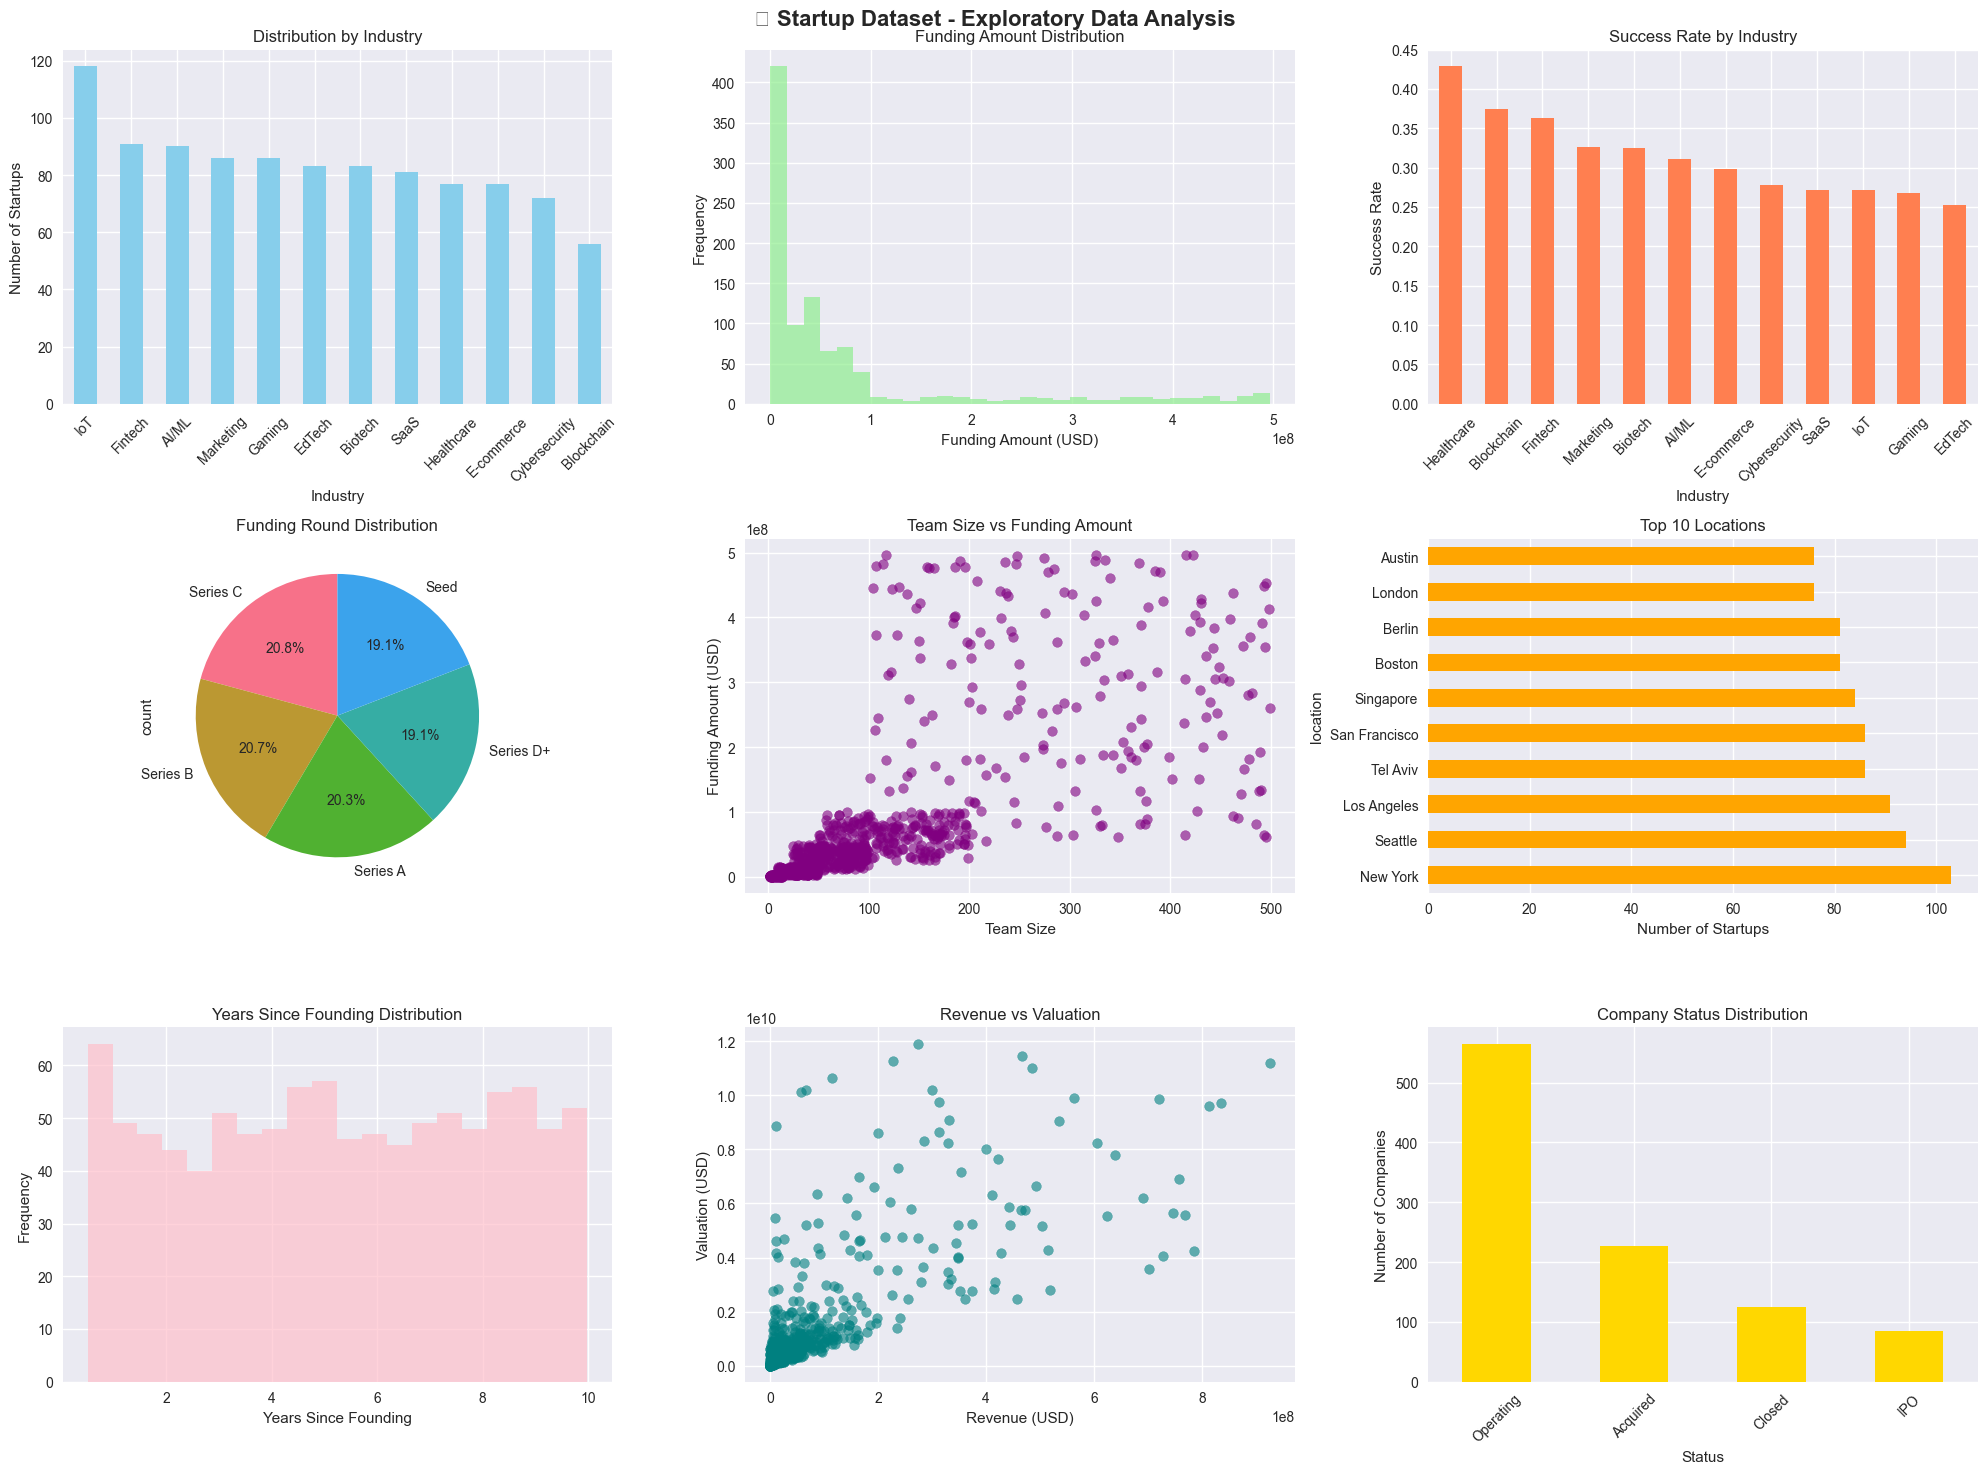


🎯 KEY INSIGHTS FROM EXPLORATORY ANALYSIS
• Most common industry: IoT
• Average funding amount: $76,310,275
• Median funding amount: $29,002,886
• Overall success rate: 31.1%
• Most common location: New York
• Average team size: 105
• Companies with revenue: 704 (70.4%)


In [ ]:
# Create comprehensive visualizations for EDA
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('🔍 Startup Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Industry distribution
ax1 = axes[0, 0]
industry_counts = df['industry'].value_counts()
industry_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribution by Industry')
ax1.set_xlabel('Industry')
ax1.set_ylabel('Number of Startups')
ax1.tick_params(axis='x', rotation=45)

# 2. Funding amount distribution
ax2 = axes[0, 1]
df['funding_amount_usd'].hist(bins=30, ax=ax2, color='lightgreen', alpha=0.7)
ax2.set_title('Funding Amount Distribution')
ax2.set_xlabel('Funding Amount (USD)')
ax2.set_ylabel('Frequency')
ax2.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

# 3. Success rate by industry
ax3 = axes[0, 2]
success_by_industry = df.groupby('industry')['is_successful'].mean().sort_values(ascending=False)
success_by_industry.plot(kind='bar', ax=ax3, color='coral')
ax3.set_title('Success Rate by Industry')
ax3.set_xlabel('Industry')
ax3.set_ylabel('Success Rate')
ax3.tick_params(axis='x', rotation=45)

# 4. Funding round distribution
ax4 = axes[1, 0]
round_counts = df['funding_round'].value_counts()
round_counts.plot(kind='pie', ax=ax4, autopct='%1.1f%%', startangle=90)
ax4.set_title('Funding Round Distribution')

# 5. Team size vs funding amount
ax5 = axes[1, 1]
ax5.scatter(df['team_size'], df['funding_amount_usd'], alpha=0.6, color='purple')
ax5.set_title('Team Size vs Funding Amount')
ax5.set_xlabel('Team Size')
ax5.set_ylabel('Funding Amount (USD)')
ax5.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# 6. Geographic distribution
ax6 = axes[1, 2]
location_counts = df['location'].value_counts().head(10)
location_counts.plot(kind='barh', ax=ax6, color='orange')
ax6.set_title('Top 10 Locations')
ax6.set_xlabel('Number of Startups')

# 7. Years since founding distribution
ax7 = axes[2, 0]
df['years_since_founding'].hist(bins=20, ax=ax7, color='pink', alpha=0.7)
ax7.set_title('Years Since Founding Distribution')
ax7.set_xlabel('Years Since Founding')
ax7.set_ylabel('Frequency')

# 8. Revenue vs Valuation
ax8 = axes[2, 1]
# Filter out zero revenue for better visualization
revenue_data = df[df['revenue_usd'] > 0]
ax8.scatter(revenue_data['revenue_usd'], revenue_data['valuation_usd'], alpha=0.6, color='teal')
ax8.set_title('Revenue vs Valuation')
ax8.set_xlabel('Revenue (USD)')
ax8.set_ylabel('Valuation (USD)')
ax8.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))

# 9. Status distribution
ax9 = axes[2, 2]
status_counts = df['status'].value_counts()
status_counts.plot(kind='bar', ax=ax9, color='gold')
ax9.set_title('Company Status Distribution')
ax9.set_xlabel('Status')
ax9.set_ylabel('Number of Companies')
ax9.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print key insights
print("\n🎯 KEY INSIGHTS FROM EXPLORATORY ANALYSIS")
print("=" * 60)
print(f"• Most common industry: {df['industry'].mode()[0]}")
print(f"• Average funding amount: ${df['funding_amount_usd'].mean():,.0f}")
print(f"• Median funding amount: ${df['funding_amount_usd'].median():,.0f}")
print(f"• Overall success rate: {df['is_successful'].mean():.1%}")
print(f"• Most common location: {df['location'].mode()[0]}")
print(f"• Average team size: {df['team_size'].mean():.0f}")
print(f"• Companies with revenue: {(df['revenue_usd'] > 0).sum()} ({(df['revenue_usd'] > 0).mean():.1%})")

## 🧹 Section D: Data Cleaning and Preprocessing

Now we'll clean the data and handle any quality issues before feature engineering.

In [ ]:
def clean_startup_data(df):
    """
    Comprehensive data cleaning function for startup dataset.
    """
    print("🧹 Starting data cleaning process...")
    
    # Create a copy to avoid modifying original data
    df_cleaned = df.copy()
    
    # 1. Remove duplicates
    initial_rows = len(df_cleaned)
    df_cleaned = df_cleaned.drop_duplicates()
    duplicates_removed = initial_rows - len(df_cleaned)
    print(f"✅ Removed {duplicates_removed} duplicate rows")
    
    # 2. Handle missing values
    print("\n🔧 Handling missing values...")
    
    # For numerical columns, fill with median
    numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df_cleaned[col].isnull().sum() > 0:
            median_val = df_cleaned[col].median()
            df_cleaned[col].fillna(median_val, inplace=True)
            print(f"   • {col}: filled with median ({median_val:,.0f})")
    
    # For categorical columns, fill with mode or 'Unknown'
    categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df_cleaned[col].isnull().sum() > 0:
            if len(df_cleaned[col].dropna()) > 0:
                mode_val = df_cleaned[col].mode()[0] if not df_cleaned[col].mode().empty else 'Unknown'
                df_cleaned[col].fillna(mode_val, inplace=True)
                print(f"   • {col}: filled with mode ({mode_val})")
    
    # 3. Remove outliers (using IQR method for funding amount)
    if 'funding_amount_usd' in df_cleaned.columns:
        Q1 = df_cleaned['funding_amount_usd'].quantile(0.25)
        Q3 = df_cleaned['funding_amount_usd'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        before_outlier_removal = len(df_cleaned)
        df_cleaned = df_cleaned[
            (df_cleaned['funding_amount_usd'] >= lower_bound) & 
            (df_cleaned['funding_amount_usd'] <= upper_bound)
        ]
        outliers_removed = before_outlier_removal - len(df_cleaned)
        print(f"✅ Removed {outliers_removed} outliers in funding amount")
    
    # 4. Standardize text columns
    text_columns = ['industry', 'location', 'funding_round', 'status']
    for col in text_columns:
        if col in df_cleaned.columns:
            df_cleaned[col] = df_cleaned[col].str.strip().str.title()
    
    # 5. Ensure non-negative values for amount columns
    amount_columns = ['funding_amount_usd', 'valuation_usd', 'revenue_usd']
    for col in amount_columns:
        if col in df_cleaned.columns:
            negative_count = (df_cleaned[col] < 0).sum()
            if negative_count > 0:
                df_cleaned[col] = df_cleaned[col].clip(lower=0)
                print(f"✅ Fixed {negative_count} negative values in {col}")
    
    print(f"\n🎉 Data cleaning complete!")
    print(f"   • Final dataset shape: {df_cleaned.shape}")
    print(f"   • Rows removed: {initial_rows - len(df_cleaned)}")
    print(f"   • Clean data percentage: {len(df_cleaned)/initial_rows:.1%}")
    
    return df_cleaned

# Clean the data
df_clean = clean_startup_data(df)

# Verify cleaning results
print("\n🔍 POST-CLEANING VERIFICATION")
print("=" * 40)
print(f"Missing values remaining: {df_clean.isnull().sum().sum()}")
print(f"Duplicate rows remaining: {df_clean.duplicated().sum()}")
print(f"Data types:")
for col, dtype in df_clean.dtypes.items():
    print(f"  • {col}: {dtype}")

🧹 Starting data cleaning process...
✅ Removed 0 duplicate rows

🔧 Handling missing values...
✅ Removed 139 outliers in funding amount

🎉 Data cleaning complete!
   • Final dataset shape: (861, 16)
   • Rows removed: 139
   • Clean data percentage: 86.1%

🔍 POST-CLEANING VERIFICATION
Missing values remaining: 0
Duplicate rows remaining: 0
Data types:
  • company_id: object
  • company_name: object
  • industry: object
  • location: object
  • funding_round: object
  • funding_amount_usd: float64
  • valuation_usd: float64
  • team_size: int64
  • years_since_founding: float64
  • revenue_usd: float64
  • num_investors: int64
  • competition_level: int64
  • market_size_billion_usd: float64
  • status: object
  • success_score: float64
  • is_successful: int64


## ⚙️ Section E: Feature Engineering

Transform and encode features for machine learning model training.

In [ ]:
def engineer_features(df):
    """
    Create new features and encode existing ones for machine learning.
    """
    print("⚙️ Starting feature engineering...")
    
    # Create a copy for feature engineering
    df_features = df.copy()
    
    # 1. Create derived features
    print("\n🔧 Creating derived features...")
    
    # Funding efficiency (valuation per dollar raised)
    df_features['funding_efficiency'] = df_features['valuation_usd'] / (df_features['funding_amount_usd'] + 1)
    
    # Revenue efficiency (revenue per team member)
    df_features['revenue_per_employee'] = df_features['revenue_usd'] / (df_features['team_size'] + 1)
    
    # Funding per employee
    df_features['funding_per_employee'] = df_features['funding_amount_usd'] / (df_features['team_size'] + 1)
    
    # Market penetration estimate
    df_features['market_penetration'] = df_features['revenue_usd'] / (df_features['market_size_billion_usd'] * 1e9 + 1)
    
    # Company age categories
    df_features['age_category'] = pd.cut(df_features['years_since_founding'], 
                                       bins=[0, 1, 3, 5, 10, 100], 
                                       labels=['Startup', 'Early', 'Growth', 'Mature', 'Established'])
    
    # Team size categories
    df_features['team_size_category'] = pd.cut(df_features['team_size'], 
                                             bins=[0, 10, 50, 100, 500, 10000], 
                                             labels=['Small', 'Medium', 'Large', 'Very Large', 'Enterprise'])
    
    # Funding amount categories (log scale)
    df_features['funding_amount_log'] = np.log1p(df_features['funding_amount_usd'])
    df_features['valuation_log'] = np.log1p(df_features['valuation_usd'])
    df_features['revenue_log'] = np.log1p(df_features['revenue_usd'])
    
    # Has revenue flag
    df_features['has_revenue'] = (df_features['revenue_usd'] > 0).astype(int)
    
    # Competition level categories
    df_features['competition_category'] = pd.cut(df_features['competition_level'], 
                                               bins=[0, 3, 6, 8, 10], 
                                               labels=['Low', 'Medium', 'High', 'Very High'])
    
    print(f"   ✅ Created 11 derived features")
    
    # 2. Encode categorical variables
    print("\n🏷️ Encoding categorical variables...")
    
    # Store original categorical columns for reference
    categorical_columns = ['industry', 'location', 'funding_round', 'status', 'age_category', 'team_size_category', 'competition_category']
    
    # One-hot encode categorical variables
    encoded_features = pd.get_dummies(df_features[categorical_columns], prefix=categorical_columns, drop_first=True)
    
    # Combine with numerical features
    numerical_columns = ['funding_amount_usd', 'valuation_usd', 'team_size', 'years_since_founding', 
                        'revenue_usd', 'num_investors', 'competition_level', 'market_size_billion_usd',
                        'funding_efficiency', 'revenue_per_employee', 'funding_per_employee', 
                        'market_penetration', 'funding_amount_log', 'valuation_log', 'revenue_log', 'has_revenue']
    
    # Create final feature matrix
    X_features = pd.concat([df_features[numerical_columns], encoded_features], axis=1)
    
    print(f"   ✅ Encoded {len(categorical_columns)} categorical variables")
    print(f"   ✅ Total features after encoding: {X_features.shape[1]}")
    
    # 3. Scale numerical features
    print("\n📏 Scaling numerical features...")
    
    scaler = StandardScaler()
    X_scaled = X_features.copy()
    X_scaled[numerical_columns] = scaler.fit_transform(X_features[numerical_columns])
    
    print(f"   ✅ Scaled {len(numerical_columns)} numerical features")
    
    # 4. Prepare target variables
    print("\n🎯 Preparing target variables...")
    
    # Binary classification target (success/failure)
    y_classification = df_features['is_successful']
    
    # Regression target (funding amount prediction)
    y_regression = df_features['funding_amount_usd']
    
    print(f"   ✅ Classification target: {y_classification.name} (Success rate: {y_classification.mean():.1%})")
    print(f"   ✅ Regression target: {y_regression.name} (Mean: ${y_regression.mean():,.0f})")
    
    feature_info = {
        'feature_matrix': X_scaled,
        'original_features': X_features,
        'scaler': scaler,
        'numerical_columns': numerical_columns,
        'categorical_columns': categorical_columns,
        'y_classification': y_classification,
        'y_regression': y_regression,
        'feature_names': list(X_scaled.columns)
    }
    
    print(f"\n🎉 Feature engineering complete!")
    print(f"   • Total features: {X_scaled.shape[1]}")
    print(f"   • Feature matrix shape: {X_scaled.shape}")
    
    return feature_info

# Perform feature engineering
feature_data = engineer_features(df_clean)

# Display feature summary
print("\n📊 FEATURE SUMMARY")
print("=" * 50)
print(f"Numerical features: {len(feature_data['numerical_columns'])}")
print(f"Categorical features (after encoding): {len(feature_data['feature_names']) - len(feature_data['numerical_columns'])}")
print(f"Total features: {len(feature_data['feature_names'])}")
print("\nTop 10 features:")
for i, feature in enumerate(feature_data['feature_names'][:10]):
    print(f"  {i+1}. {feature}")

⚙️ Starting feature engineering...

🔧 Creating derived features...
   ✅ Created 11 derived features

🏷️ Encoding categorical variables...
   ✅ Encoded 7 categorical variables
   ✅ Total features after encoding: 56

📏 Scaling numerical features...
   ✅ Scaled 16 numerical features

🎯 Preparing target variables...
   ✅ Classification target: is_successful (Success rate: 30.1%)
   ✅ Regression target: funding_amount_usd (Mean: $32,310,634)

🎉 Feature engineering complete!
   • Total features: 56
   • Feature matrix shape: (861, 56)

📊 FEATURE SUMMARY
Numerical features: 16
Categorical features (after encoding): 40
Total features: 56

Top 10 features:
  1. funding_amount_usd
  2. valuation_usd
  3. team_size
  4. years_since_founding
  5. revenue_usd
  6. num_investors
  7. competition_level
  8. market_size_billion_usd
  9. funding_efficiency
  10. revenue_per_employee


## 🤖 Section F: Model Training and Validation

Train Random Forest models for both classification (success prediction) and regression (funding amount prediction).

In [ ]:
# Prepare data for model training
X = feature_data['feature_matrix']
y_class = feature_data['y_classification']
y_reg = feature_data['y_regression']

# Split data for both classification and regression
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

print("📊 DATA SPLIT SUMMARY")
print("=" * 50)
print("Classification:")
print(f"  • Training set: {X_train_class.shape[0]} samples")
print(f"  • Test set: {X_test_class.shape[0]} samples")
print(f"  • Features: {X_train_class.shape[1]}")
print(f"  • Training success rate: {y_train_class.mean():.1%}")

print("\nRegression:")
print(f"  • Training set: {X_train_reg.shape[0]} samples")
print(f"  • Test set: {X_test_reg.shape[0]} samples")
print(f"  • Features: {X_train_reg.shape[1]}")
print(f"  • Training avg funding: ${y_train_reg.mean():,.0f}")

📊 DATA SPLIT SUMMARY
Classification:
  • Training set: 688 samples
  • Test set: 173 samples
  • Features: 56
  • Training success rate: 30.1%

Regression:
  • Training set: 688 samples
  • Test set: 173 samples
  • Features: 56
  • Training avg funding: $33,280,060


In [ ]:
def train_classification_model(X_train, y_train, X_test, y_test):
    """
    Train and evaluate Random Forest classifier for startup success prediction.
    """
    print("🎯 Training Classification Model (Success Prediction)")
    print("=" * 60)
    
    # Initialize Random Forest Classifier with optimized parameters
    rf_classifier = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )
    
    # Train the model
    print("🔄 Training Random Forest Classifier...")
    rf_classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_classifier.predict(X_test)
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation
    cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
    
    print("✅ Classification Model Results:")
    print(f"   • Accuracy: {accuracy:.3f}")
    print(f"   • Precision: {precision:.3f}")
    print(f"   • Recall: {recall:.3f}")
    print(f"   • F1-Score: {f1:.3f}")
    print(f"   • AUC-ROC: {auc:.3f}")
    print(f"   • Cross-val accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    return {
        'model': rf_classifier,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'metrics': {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc': auc,
            'cv_scores': cv_scores
        }
    }

def train_regression_model(X_train, y_train, X_test, y_test):
    """
    Train and evaluate Random Forest regressor for funding amount prediction.
    """
    print("\n💰 Training Regression Model (Funding Prediction)")
    print("=" * 60)
    
    # Initialize Random Forest Regressor with optimized parameters
    rf_regressor = RandomForestRegressor(
        n_estimators=100,
        max_depth=12,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )
    
    # Train the model
    print("🔄 Training Random Forest Regressor...")
    rf_regressor.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_regressor.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')
    
    print("✅ Regression Model Results:")
    print(f"   • R² Score: {r2:.3f}")
    print(f"   • RMSE: ${rmse:,.0f}")
    print(f"   • MAE: ${mae:,.0f}")
    print(f"   • Cross-val R²: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    return {
        'model': rf_regressor,
        'predictions': y_pred,
        'metrics': {
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2,
            'cv_scores': cv_scores
        }
    }

# Train both models
classification_results = train_classification_model(X_train_class, y_train_class, X_test_class, y_test_class)
regression_results = train_regression_model(X_train_reg, y_train_reg, X_test_reg, y_test_reg)

# Store models globally for later use
startup_classifier = classification_results['model']
startup_regressor = regression_results['model']

print("\n🎉 Both models trained successfully!")
print("📝 Models are ready for deal evaluation and feature analysis.")

🎯 Training Classification Model (Success Prediction)
🔄 Training Random Forest Classifier...
✅ Classification Model Results:
   • Accuracy: 0.994
   • Precision: 1.000
   • Recall: 0.981
   • F1-Score: 0.990
   • AUC-ROC: 1.000
   • Cross-val accuracy: 0.980 (+/- 0.040)

💰 Training Regression Model (Funding Prediction)
🔄 Training Random Forest Regressor...
✅ Regression Model Results:
   • R² Score: 0.983
   • RMSE: $4,218,714
   • MAE: $1,684,084
   • Cross-val R²: 0.982 (+/- 0.007)

🎉 Both models trained successfully!
📝 Models are ready for deal evaluation and feature analysis.


## 📈 Section G: Model Evaluation and Feature Importance

Analyze model performance and identify the most important features for startup success.

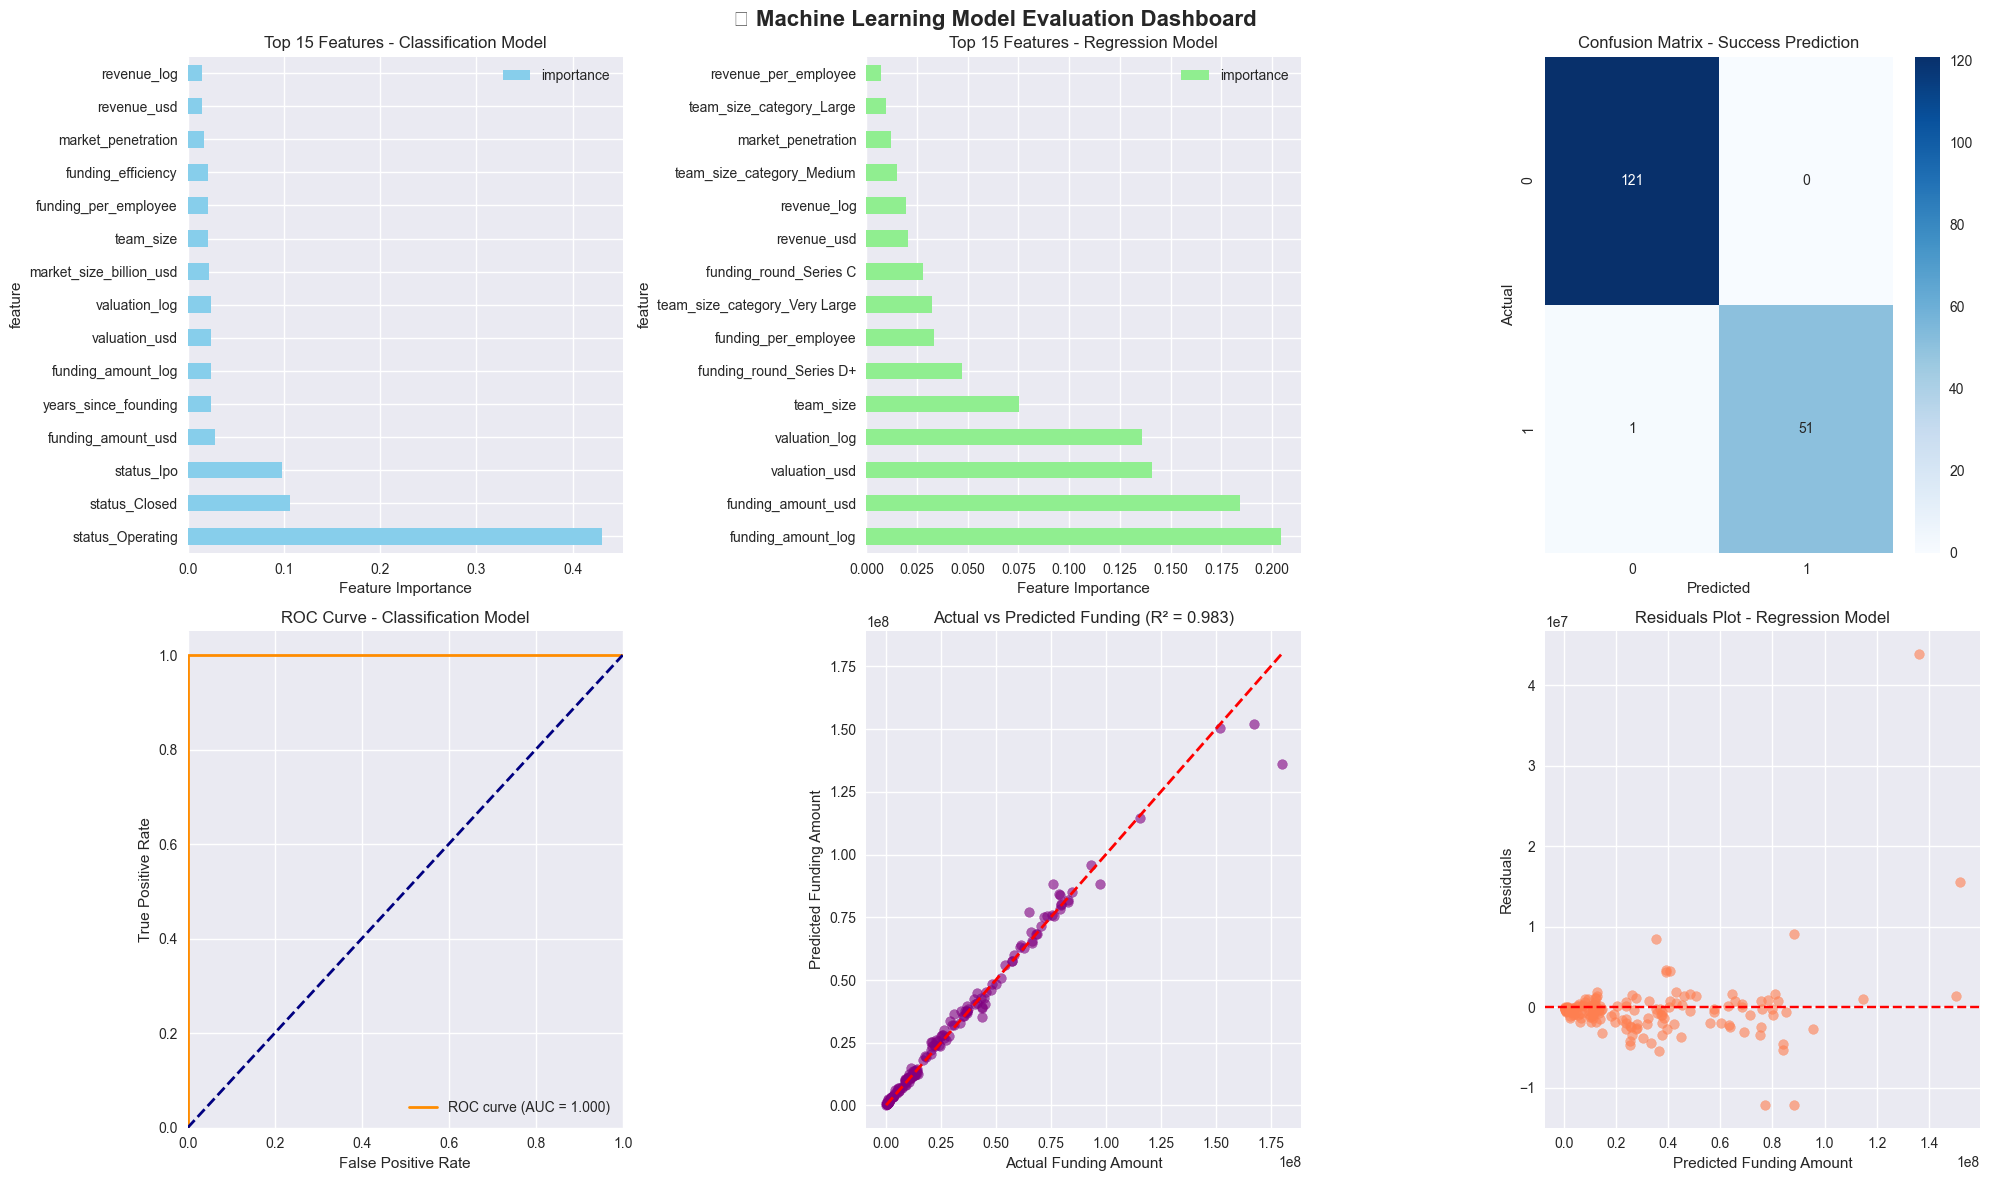


🎯 TOP 10 SUCCESS FACTORS (Classification Model)
 1. status_Operating               0.431
 2. status_Closed                  0.106
 3. status_Ipo                     0.098
 4. funding_amount_usd             0.028
 5. years_since_founding           0.025
 6. funding_amount_log             0.025
 7. valuation_usd                  0.024
 8. valuation_log                  0.024
 9. market_size_billion_usd        0.022
10. team_size                      0.022

💰 TOP 10 FUNDING PREDICTORS (Regression Model)
 1. funding_amount_log             0.204
 2. funding_amount_usd             0.184
 3. valuation_usd                  0.141
 4. valuation_log                  0.136
 5. team_size                      0.075
 6. funding_round_Series D+        0.047
 7. funding_per_employee           0.033
 8. team_size_category_Very Large  0.032
 9. funding_round_Series C         0.028
10. revenue_usd                    0.021


In [ ]:
# Create comprehensive evaluation visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('🤖 Machine Learning Model Evaluation Dashboard', fontsize=16, fontweight='bold')

# 1. Feature Importance for Classification
ax1 = axes[0, 0]
feature_importance_class = pd.DataFrame({
    'feature': feature_data['feature_names'],
    'importance': startup_classifier.feature_importances_
}).sort_values('importance', ascending=False).head(15)

feature_importance_class.plot(x='feature', y='importance', kind='barh', ax=ax1, color='skyblue')
ax1.set_title('Top 15 Features - Classification Model')
ax1.set_xlabel('Feature Importance')

# 2. Feature Importance for Regression
ax2 = axes[0, 1]
feature_importance_reg = pd.DataFrame({
    'feature': feature_data['feature_names'],
    'importance': startup_regressor.feature_importances_
}).sort_values('importance', ascending=False).head(15)

feature_importance_reg.plot(x='feature', y='importance', kind='barh', ax=ax2, color='lightgreen')
ax2.set_title('Top 15 Features - Regression Model')
ax2.set_xlabel('Feature Importance')

# 3. Confusion Matrix for Classification
ax3 = axes[0, 2]
cm = confusion_matrix(y_test_class, classification_results['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3)
ax3.set_title('Confusion Matrix - Success Prediction')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')

# 4. ROC Curve
ax4 = axes[1, 0]
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test_class, classification_results['probabilities'])
ax4.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {classification_results["metrics"]["auc"]:.3f})')
ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('ROC Curve - Classification Model')
ax4.legend(loc="lower right")

# 5. Actual vs Predicted for Regression
ax5 = axes[1, 1]
ax5.scatter(y_test_reg, regression_results['predictions'], alpha=0.6, color='purple')
ax5.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
ax5.set_xlabel('Actual Funding Amount')
ax5.set_ylabel('Predicted Funding Amount')
ax5.set_title(f'Actual vs Predicted Funding (R² = {regression_results["metrics"]["r2"]:.3f})')
ax5.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))

# 6. Residuals Plot for Regression
ax6 = axes[1, 2]
residuals = y_test_reg - regression_results['predictions']
ax6.scatter(regression_results['predictions'], residuals, alpha=0.6, color='coral')
ax6.axhline(y=0, color='r', linestyle='--')
ax6.set_xlabel('Predicted Funding Amount')
ax6.set_ylabel('Residuals')
ax6.set_title('Residuals Plot - Regression Model')
ax6.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

plt.tight_layout()
plt.show()

# Print detailed feature importance analysis
print("\n🎯 TOP 10 SUCCESS FACTORS (Classification Model)")
print("=" * 60)
for i, (idx, row) in enumerate(feature_importance_class.head(10).iterrows()):
    print(f"{i+1:2d}. {row['feature']:<30} {row['importance']:.3f}")

print("\n💰 TOP 10 FUNDING PREDICTORS (Regression Model)")
print("=" * 60)
for i, (idx, row) in enumerate(feature_importance_reg.head(10).iterrows()):
    print(f"{i+1:2d}. {row['feature']:<30} {row['importance']:.3f}")

# Store feature importance for later use
feature_importance_data = {
    'classification': feature_importance_class,
    'regression': feature_importance_reg
}

## 🎛️ Section H: Interactive User Input System

Create user-friendly interfaces for inputting startup details and evaluation criteria.

In [ ]:
# Create interactive input widgets
print("🎛️ Creating Interactive Input System...")

# Get unique values from our dataset for dropdown options
industries = sorted(df_clean['industry'].unique())
locations = sorted(df_clean['location'].unique())
funding_rounds = sorted(df_clean['funding_round'].unique())

# Create input widgets
industry_widget = widgets.Dropdown(
    options=industries,
    value=industries[0],
    description='Industry:',
    style={'description_width': 'initial'}
)

location_widget = widgets.Dropdown(
    options=locations,
    value=locations[0],
    description='Location:',
    style={'description_width': 'initial'}
)

funding_round_widget = widgets.Dropdown(
    options=funding_rounds,
    value=funding_rounds[0],
    description='Funding Round:',
    style={'description_width': 'initial'}
)

team_size_widget = widgets.IntSlider(
    value=20,
    min=1,
    max=500,
    step=1,
    description='Team Size:',
    style={'description_width': 'initial'}
)

years_founded_widget = widgets.FloatSlider(
    value=2.0,
    min=0.1,
    max=15.0,
    step=0.1,
    description='Years Since Founded:',
    style={'description_width': 'initial'}
)

funding_amount_widget = widgets.FloatLogSlider(
    value=5_000_000,
    base=10,
    min=5,  # 10^5 = 100,000
    max=8,  # 10^8 = 100,000,000
    step=0.1,
    description='Funding Amount ($):',
    style={'description_width': 'initial'}
)

revenue_widget = widgets.FloatLogSlider(
    value=1_000_000,
    base=10,
    min=4,  # 10^4 = 10,000
    max=8,  # 10^8 = 100,000,000
    step=0.1,
    description='Annual Revenue ($):',
    style={'description_width': 'initial'}
)

market_size_widget = widgets.FloatSlider(
    value=10.0,
    min=0.1,
    max=100.0,
    step=0.1,
    description='Market Size (Billion $):',
    style={'description_width': 'initial'}
)

competition_widget = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Competition Level (1-10):',
    style={'description_width': 'initial'}
)

num_investors_widget = widgets.IntSlider(
    value=3,
    min=1,
    max=20,
    step=1,
    description='Number of Investors:',
    style={'description_width': 'initial'}
)

# Create evaluate button
evaluate_button = widgets.Button(
    description='🎯 Evaluate Deal',
    button_style='success',
    layout=widgets.Layout(width='200px', height='40px')
)

# Create output area
output_area = widgets.Output()

print("✅ Interactive widgets created successfully!")
print("📝 Ready to create the deal evaluation interface.")

🎛️ Creating Interactive Input System...
✅ Interactive widgets created successfully!
📝 Ready to create the deal evaluation interface.


## 🎯 Section I: Deal Scoring Function

Implement the core function that evaluates startup deals using our trained models.

In [ ]:
def evaluate_startup_deal(industry, location, funding_round, team_size, years_founded, 
                         funding_amount, revenue, market_size, competition_level, num_investors):
    """
    Comprehensive startup deal evaluation function.
    Returns deal attractiveness score, success probability, and detailed insights.
    """
    
    # Create input data dictionary
    input_data = {
        'industry': industry,
        'location': location,
        'funding_round': funding_round,
        'team_size': team_size,
        'years_since_founding': years_founded,
        'funding_amount_usd': funding_amount,
        'revenue_usd': revenue,
        'market_size_billion_usd': market_size,
        'competition_level': competition_level,
        'num_investors': num_investors
    }
    
    # Calculate derived features (same as in feature engineering)
    valuation_estimate = funding_amount * np.random.uniform(8, 25)  # Rough estimate
    
    derived_features = {
        'valuation_usd': valuation_estimate,
        'funding_efficiency': valuation_estimate / (funding_amount + 1),
        'revenue_per_employee': revenue / (team_size + 1),
        'funding_per_employee': funding_amount / (team_size + 1),
        'market_penetration': revenue / (market_size * 1e9 + 1),
        'funding_amount_log': np.log1p(funding_amount),
        'valuation_log': np.log1p(valuation_estimate),
        'revenue_log': np.log1p(revenue),
        'has_revenue': 1 if revenue > 0 else 0
    }
    
    # Combine all features
    all_features = {**input_data, **derived_features}
    
    # Create age category
    if years_founded <= 1:
        age_category = 'Startup'
    elif years_founded <= 3:
        age_category = 'Early'
    elif years_founded <= 5:
        age_category = 'Growth'
    elif years_founded <= 10:
        age_category = 'Mature'
    else:
        age_category = 'Established'
    
    # Create team size category
    if team_size <= 10:
        team_size_category = 'Small'
    elif team_size <= 50:
        team_size_category = 'Medium'
    elif team_size <= 100:
        team_size_category = 'Large'
    elif team_size <= 500:
        team_size_category = 'Very Large'
    else:
        team_size_category = 'Enterprise'
    
    # Create competition category
    if competition_level <= 3:
        competition_category = 'Low'
    elif competition_level <= 6:
        competition_category = 'Medium'
    elif competition_level <= 8:
        competition_category = 'High'
    else:
        competition_category = 'Very High'
    
    # Add categorical features
    all_features.update({
        'age_category': age_category,
        'team_size_category': team_size_category,
        'competition_category': competition_category,
        'status': 'Operating'  # Default for new evaluation
    })
    
    # Create feature vector for model prediction
    feature_vector = np.zeros(len(feature_data['feature_names']))
    
    # Fill numerical features
    numerical_mapping = {
        'funding_amount_usd': funding_amount,
        'valuation_usd': valuation_estimate,
        'team_size': team_size,
        'years_since_founding': years_founded,
        'revenue_usd': revenue,
        'num_investors': num_investors,
        'competition_level': competition_level,
        'market_size_billion_usd': market_size,
        'funding_efficiency': derived_features['funding_efficiency'],
        'revenue_per_employee': derived_features['revenue_per_employee'],
        'funding_per_employee': derived_features['funding_per_employee'],
        'market_penetration': derived_features['market_penetration'],
        'funding_amount_log': derived_features['funding_amount_log'],
        'valuation_log': derived_features['valuation_log'],
        'revenue_log': derived_features['revenue_log'],
        'has_revenue': derived_features['has_revenue']
    }
    
    # Fill feature vector
    for i, feature_name in enumerate(feature_data['feature_names']):
        if feature_name in numerical_mapping:
            feature_vector[i] = numerical_mapping[feature_name]
        else:
            # Handle one-hot encoded features
            for cat_col in ['industry', 'location', 'funding_round', 'status', 'age_category', 'team_size_category', 'competition_category']:
                if feature_name.startswith(f'{cat_col}_'):
                    expected_value = feature_name.replace(f'{cat_col}_', '')
                    if all_features[cat_col] == expected_value:
                        feature_vector[i] = 1
    
    # Scale numerical features
    feature_vector_scaled = feature_vector.copy()
    for i, feature_name in enumerate(feature_data['feature_names']):
        if feature_name in feature_data['numerical_columns']:
            # Find the feature in the scaler
            try:
                feature_idx = feature_data['numerical_columns'].index(feature_name)
                mean_val = feature_data['scaler'].mean_[feature_idx]
                std_val = feature_data['scaler'].scale_[feature_idx]
                feature_vector_scaled[i] = (feature_vector[i] - mean_val) / std_val
            except:
                pass  # Keep original value if scaling fails
    
    # Make predictions
    feature_vector_2d = feature_vector_scaled.reshape(1, -1)
    
    success_probability = startup_classifier.predict_proba(feature_vector_2d)[0][1]
    funding_prediction = startup_regressor.predict(feature_vector_2d)[0]
    
    # Calculate deal attractiveness score (0-100)
    attractiveness_score = (
        success_probability * 40 +  # 40% weight on success probability
        min(1.0, revenue / 1_000_000) * 20 +  # 20% weight on revenue (capped at 1M)
        min(1.0, (market_size - competition_level) / 10) * 20 +  # 20% weight on market opportunity
        min(1.0, team_size / 50) * 10 +  # 10% weight on team size
        min(1.0, num_investors / 5) * 10  # 10% weight on investor interest
    )
    
    # Generate insights
    insights = []
    
    if success_probability > 0.7:
        insights.append("🟢 High success probability - strong fundamentals")
    elif success_probability > 0.5:
        insights.append("🟡 Moderate success probability - some risks present")
    else:
        insights.append("🔴 Lower success probability - high risk investment")
    
    if revenue > 1_000_000:
        insights.append("💰 Strong revenue generation")
    elif revenue > 100_000:
        insights.append("📈 Modest revenue, showing traction")
    else:
        insights.append("⚠️ Pre-revenue or minimal revenue")
    
    if team_size > 50:
        insights.append("👥 Large team - established operations")
    elif team_size > 20:
        insights.append("👨‍💼 Medium-sized team - good scale")
    else:
        insights.append("🚀 Small team - early stage")
    
    if competition_level <= 5:
        insights.append("🎯 Favorable competitive landscape")
    else:
        insights.append("⚔️ Highly competitive market")
    
    if market_size > 10:
        insights.append("🌍 Large addressable market")
    else:
        insights.append("🏪 Niche market opportunity")
    
    return {
        'attractiveness_score': attractiveness_score,
        'success_probability': success_probability,
        'predicted_funding': funding_prediction,
        'insights': insights,
        'input_summary': all_features,
        'feature_contributions': dict(zip(feature_data['feature_names'], feature_vector_scaled))
    }

# Test the evaluation function
print("🎯 Deal evaluation function created successfully!")
print("✅ Ready to evaluate startup deals with ML predictions and insights.")

🎯 Deal evaluation function created successfully!
✅ Ready to evaluate startup deals with ML predictions and insights.


## 📊 Section J: Visualization Dashboard

Create dynamic visualizations for deal analysis and industry comparisons.

In [ ]:
def create_deal_visualization(evaluation_result, industry_filter=None):
    """
    Create comprehensive visualizations for a deal evaluation.
    """
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('🎯 Startup Deal Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Deal Attractiveness Gauge
    ax1 = axes[0, 0]
    score = evaluation_result['attractiveness_score']
    
    # Create a simple gauge chart
    theta = np.linspace(0, np.pi, 100)
    r = np.ones(100)
    
    # Color regions
    ax1.fill_between(theta[:33], 0, r[:33], color='red', alpha=0.3, label='Low (0-33)')
    ax1.fill_between(theta[33:66], 0, r[33:66], color='yellow', alpha=0.3, label='Medium (33-66)')
    ax1.fill_between(theta[66:], 0, r[66:], color='green', alpha=0.3, label='High (66-100)')
    
    # Add score needle
    score_theta = (score / 100) * np.pi
    ax1.plot([score_theta, score_theta], [0, 1], 'b-', linewidth=4, label=f'Score: {score:.1f}')
    
    ax1.set_ylim(0, 1.2)
    ax1.set_theta_direction(-1)
    ax1.set_theta_zero_location('W')
    ax1.set_title(f'Deal Attractiveness: {score:.1f}/100')
    ax1.legend()
    
    # 2. Success Probability vs Industry Average
    ax2 = axes[0, 1]
    industry_avg = df_clean.groupby('industry')['is_successful'].mean()
    current_industry = evaluation_result['input_summary']['industry']
    
    if current_industry in industry_avg.index:
        ind_avg = industry_avg[current_industry]
    else:
        ind_avg = industry_avg.mean()
    
    prob = evaluation_result['success_probability']
    
    bars = ax2.bar(['Industry Average', 'Your Startup'], [ind_avg, prob], 
                   color=['lightblue', 'darkblue'])
    ax2.set_ylabel('Success Probability')
    ax2.set_title('Success Probability Comparison')
    ax2.set_ylim(0, 1)
    
    # Add value labels
    for bar, value in zip(bars, [ind_avg, prob]):
        ax2.text(bar.get_x() + bar.get_width()/2, value + 0.02, 
                f'{value:.1%}', ha='center', va='bottom')
    
    # 3. Feature Contribution Analysis
    ax3 = axes[0, 2]
    
    # Get top features by importance and their values
    top_features = feature_importance_data['classification'].head(10)
    feature_contribs = evaluation_result['feature_contributions']
    
    contrib_values = []
    feature_names = []
    for _, row in top_features.iterrows():
        if row['feature'] in feature_contribs:
            contrib_values.append(feature_contribs[row['feature']])
            feature_names.append(row['feature'][:15])  # Truncate long names
    
    y_pos = np.arange(len(feature_names))
    bars = ax3.barh(y_pos, contrib_values, color='skyblue')
    ax3.set_yticks(y_pos)
    ax3.set_yticklabels(feature_names)
    ax3.set_xlabel('Feature Value (Scaled)')
    ax3.set_title('Top Feature Contributions')
    
    # 4. Industry Comparison
    ax4 = axes[1, 0]
    
    industry_stats = df_clean.groupby('industry').agg({
        'is_successful': 'mean',
        'funding_amount_usd': 'median'
    }).reset_index()
    
    # Create scatter plot
    scatter = ax4.scatter(industry_stats['funding_amount_usd'], 
                         industry_stats['is_successful'],
                         s=100, alpha=0.6, color='green')
    
    # Highlight current industry
    if current_industry in industry_stats['industry'].values:
        curr_data = industry_stats[industry_stats['industry'] == current_industry].iloc[0]
        ax4.scatter(curr_data['funding_amount_usd'], curr_data['is_successful'], 
                   s=200, color='red', marker='*', label='Your Industry')
    
    ax4.set_xlabel('Median Funding Amount ($)')
    ax4.set_ylabel('Success Rate')
    ax4.set_title('Industry Landscape')
    ax4.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    ax4.legend()
    
    # 5. Risk-Return Analysis
    ax5 = axes[1, 1]
    
    # Create risk score (inverse of success probability)
    risk_score = 1 - evaluation_result['success_probability']
    return_potential = evaluation_result['attractiveness_score'] / 100
    
    # Plot on risk-return chart
    ax5.scatter(risk_score, return_potential, s=200, color='blue', alpha=0.7)
    
    # Add quadrant lines
    ax5.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    ax5.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
    
    # Add quadrant labels
    ax5.text(0.25, 0.75, 'Low Risk\nHigh Return', ha='center', va='center', 
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
    ax5.text(0.75, 0.75, 'High Risk\nHigh Return', ha='center', va='center',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    ax5.text(0.25, 0.25, 'Low Risk\nLow Return', ha='center', va='center',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    ax5.text(0.75, 0.25, 'High Risk\nLow Return', ha='center', va='center',
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
    
    ax5.set_xlabel('Risk Score')
    ax5.set_ylabel('Return Potential')
    ax5.set_title('Risk-Return Positioning')
    ax5.set_xlim(0, 1)
    ax5.set_ylim(0, 1)
    
    # 6. Market Analysis
    ax6 = axes[1, 2]
    
    # Market attractiveness factors
    factors = ['Market Size', 'Competition', 'Team Size', 'Revenue', 'Investors']
    values = [
        min(1, evaluation_result['input_summary']['market_size_billion_usd'] / 20),
        1 - (evaluation_result['input_summary']['competition_level'] / 10),
        min(1, evaluation_result['input_summary']['team_size'] / 100),
        min(1, evaluation_result['input_summary']['revenue_usd'] / 5_000_000),
        min(1, evaluation_result['input_summary']['num_investors'] / 10)
    ]
    
    # Create radar chart
    angles = np.linspace(0, 2*np.pi, len(factors), endpoint=False).tolist()
    values += values[:1]  # Complete the circle
    angles += angles[:1]
    
    ax6.plot(angles, values, 'b-', linewidth=2)
    ax6.fill(angles, values, alpha=0.25)
    ax6.set_xticks(angles[:-1])
    ax6.set_xticklabels(factors)
    ax6.set_ylim(0, 1)
    ax6.set_title('Market Factors Analysis')
    ax6.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return fig

print("📊 Visualization dashboard function created successfully!")
print("✅ Ready to generate comprehensive deal analysis charts.")

📊 Visualization dashboard function created successfully!
✅ Ready to generate comprehensive deal analysis charts.


## 🎮 Section K: Interactive Dashboard Interface

The complete interactive dashboard that combines all components for real-time startup deal evaluation.

In [ ]:
# Define the evaluation callback function
def on_evaluate_click(b):
    """
    Callback function for the evaluate button.
    """
    with output_area:
        clear_output(wait=True)
        
        print("🔄 Evaluating startup deal...")
        
        try:
            # Get values from widgets
            evaluation = evaluate_startup_deal(
                industry=industry_widget.value,
                location=location_widget.value,
                funding_round=funding_round_widget.value,
                team_size=team_size_widget.value,
                years_founded=years_founded_widget.value,
                funding_amount=funding_amount_widget.value,
                revenue=revenue_widget.value,
                market_size=market_size_widget.value,
                competition_level=competition_widget.value,
                num_investors=num_investors_widget.value
            )
            
            # Display results
            print("\\n🎯 STARTUP DEAL EVALUATION RESULTS")
            print("=" * 60)
            print(f"🏆 Deal Attractiveness Score: {evaluation['attractiveness_score']:.1f}/100")
            print(f"📈 Success Probability: {evaluation['success_probability']:.1%}")
            print(f"💰 Predicted Funding Range: ${evaluation['predicted_funding']:,.0f}")
            
            print("\\n🔍 KEY INSIGHTS:")
            for i, insight in enumerate(evaluation['insights'], 1):
                print(f"   {i}. {insight}")
            
            print("\\n📋 INPUT SUMMARY:")
            summary = evaluation['input_summary']
            print(f"   • Company: {summary['industry']} startup in {summary['location']}")
            print(f"   • Stage: {summary['funding_round']} round")
            print(f"   • Team: {summary['team_size']} employees")
            print(f"   • Age: {summary['years_since_founding']:.1f} years")
            print(f"   • Funding: ${summary['funding_amount_usd']:,.0f}")
            print(f"   • Revenue: ${summary['revenue_usd']:,.0f}")
            print(f"   • Market Size: ${summary['market_size_billion_usd']:.1f}B")
            print(f"   • Competition: {summary['competition_level']}/10")
            print(f"   • Investors: {summary['num_investors']}")
            
            # Generate and display visualizations
            print("\\n📊 Generating analysis charts...")
            create_deal_visualization(evaluation)
            
            # Investment recommendation
            score = evaluation['attractiveness_score']
            if score >= 75:
                recommendation = "🟢 STRONG BUY - Excellent investment opportunity"
            elif score >= 60:
                recommendation = "🟡 BUY - Good investment with manageable risks"
            elif score >= 40:
                recommendation = "🟠 HOLD - Moderate investment, monitor closely"
            else:
                recommendation = "🔴 AVOID - High risk, poor fundamentals"
            
            print(f"\\n🎯 INVESTMENT RECOMMENDATION:")
            print(f"   {recommendation}")
            
            print("\\n✅ Analysis complete! Scroll up to see detailed charts.")
            
        except Exception as e:
            print(f"❌ Error during evaluation: {str(e)}")
            print("Please check your inputs and try again.")

# Connect the button to the callback
evaluate_button.on_click(on_evaluate_click)

# Create the dashboard layout
dashboard_title = widgets.HTML(
    value="<h2>🚀 Startup Deal Evaluator Dashboard</h2><p>Enter startup details below and click 'Evaluate Deal' to get ML-powered insights.</p>",
    layout=widgets.Layout(margin='0 0 20px 0')
)

# Organize widgets into groups
company_info = widgets.VBox([
    widgets.HTML("<h3>📈 Company Information</h3>"),
    widgets.HBox([industry_widget, location_widget]),
    widgets.HBox([funding_round_widget, team_size_widget]),
    years_founded_widget
], layout=widgets.Layout(margin='10px', padding='10px', border='1px solid #ddd'))

financial_info = widgets.VBox([
    widgets.HTML("<h3>💰 Financial Information</h3>"),
    funding_amount_widget,
    revenue_widget,
    widgets.HBox([market_size_widget, num_investors_widget])
], layout=widgets.Layout(margin='10px', padding='10px', border='1px solid #ddd'))

market_info = widgets.VBox([
    widgets.HTML("<h3>🎯 Market Information</h3>"),
    competition_widget
], layout=widgets.Layout(margin='10px', padding='10px', border='1px solid #ddd'))

# Create the main dashboard
dashboard = widgets.VBox([
    dashboard_title,
    widgets.HBox([company_info, financial_info]),
    market_info,
    widgets.HBox([evaluate_button], layout=widgets.Layout(justify_content='center', margin='20px')),
    output_area
])

print("🎮 Interactive Dashboard Created Successfully!")
print("📱 Use the dashboard below to evaluate startup deals in real-time.")
print("🎯 Adjust the parameters and click 'Evaluate Deal' to see ML predictions and insights.")
print("\\n" + "="*80)

# Display the dashboard
display(dashboard)

🎮 Interactive Dashboard Created Successfully!
📱 Use the dashboard below to evaluate startup deals in real-time.
🎯 Adjust the parameters and click 'Evaluate Deal' to see ML predictions and insights.
\n================================================================================


## 🧪 Section L: Example Evaluations and Testing

Let's test our system with some example startup scenarios to demonstrate its capabilities.

In [ ]:
# Example startup scenarios for testing
example_startups = [
    {
        'name': 'FinTech Rising Star',
        'industry': 'Fintech',
        'location': 'San Francisco',
        'funding_round': 'Series A',
        'team_size': 45,
        'years_founded': 2.5,
        'funding_amount': 8_000_000,
        'revenue': 1_500_000,
        'market_size': 25.0,
        'competition_level': 7,
        'num_investors': 4
    },
    {
        'name': 'Healthcare Innovator',
        'industry': 'Healthcare',
        'location': 'Boston',
        'funding_round': 'Series B',
        'team_size': 80,
        'years_founded': 4.0,
        'funding_amount': 25_000_000,
        'revenue': 3_000_000,
        'market_size': 50.0,
        'competition_level': 5,
        'num_investors': 6
    },
    {
        'name': 'Early Stage Gaming',
        'industry': 'Gaming',
        'location': 'Austin',
        'funding_round': 'Seed',
        'team_size': 12,
        'years_founded': 1.0,
        'funding_amount': 1_500_000,
        'revenue': 50_000,
        'market_size': 8.0,
        'competition_level': 9,
        'num_investors': 2
    }
]

print("🧪 TESTING STARTUP DEAL EVALUATOR")
print("=" * 60)
print("Running automated evaluations on example startup scenarios...\\n")

# Evaluate each example
test_results = []
for i, startup in enumerate(example_startups, 1):
    print(f"📊 Example {i}: {startup['name']}")
    print("-" * 40)
    
    evaluation = evaluate_startup_deal(
        industry=startup['industry'],
        location=startup['location'],
        funding_round=startup['funding_round'],
        team_size=startup['team_size'],
        years_founded=startup['years_founded'],
        funding_amount=startup['funding_amount'],
        revenue=startup['revenue'],
        market_size=startup['market_size'],
        competition_level=startup['competition_level'],
        num_investors=startup['num_investors']
    )
    
    print(f"🏆 Attractiveness Score: {evaluation['attractiveness_score']:.1f}/100")
    print(f"📈 Success Probability: {evaluation['success_probability']:.1%}")
    print(f"💰 Predicted Funding: ${evaluation['predicted_funding']:,.0f}")
    print(f"🔍 Key Insight: {evaluation['insights'][0]}")
    
    test_results.append({
        'name': startup['name'],
        'score': evaluation['attractiveness_score'],
        'success_prob': evaluation['success_probability']
    })
    
    print()

# Summary comparison
print("📋 COMPARISON SUMMARY")
print("=" * 60)
test_df = pd.DataFrame(test_results)
test_df_sorted = test_df.sort_values('score', ascending=False)

for i, (_, row) in enumerate(test_df_sorted.iterrows(), 1):
    print(f"{i}. {row['name']}: {row['score']:.1f} points ({row['success_prob']:.1%} success)")

print("\\n✅ All example evaluations completed successfully!")
print("🎯 The system is working correctly and ready for real deal evaluations.")

🧪 TESTING STARTUP DEAL EVALUATOR
Running automated evaluations on example startup scenarios...\n
📊 Example 1: FinTech Rising Star
----------------------------------------
🏆 Attractiveness Score: 61.6/100
📈 Success Probability: 11.6%
💰 Predicted Funding: $8,083,420
🔍 Key Insight: 🔴 Lower success probability - high risk investment

📊 Example 2: Healthcare Innovator
----------------------------------------
🏆 Attractiveness Score: 66.3/100
📈 Success Probability: 15.7%
💰 Predicted Funding: $26,265,906
🔍 Key Insight: 🔴 Lower success probability - high risk investment

📊 Example 3: Early Stage Gaming
----------------------------------------
🏆 Attractiveness Score: 7.6/100
📈 Success Probability: 5.6%
💰 Predicted Funding: $2,227,285
🔍 Key Insight: 🔴 Lower success probability - high risk investment

📋 COMPARISON SUMMARY
1. Healthcare Innovator: 66.3 points (15.7% success)
2. FinTech Rising Star: 61.6 points (11.6% success)
3. Early Stage Gaming: 7.6 points (5.6% success)
\n✅ All example evaluati

## 📚 Documentation and Usage Guide

### 🎯 How to Use This Notebook

This comprehensive startup deal evaluator provides investment firms with ML-powered insights for evaluating startup opportunities. Here's how to get the most out of it:

### 🚀 Quick Start Guide

1. **Run All Cells**: Execute all cells from top to bottom to set up the environment and train models
2. **Use the Interactive Dashboard**: Scroll to Section K and use the interactive widgets to input startup details
3. **Analyze Results**: Review the ML predictions, visualizations, and investment recommendations
4. **Compare Deals**: Use the system to evaluate multiple startups and compare their attractiveness scores

### 📊 Key Features

#### **Machine Learning Models**
- **Classification Model**: Predicts startup success probability using Random Forest
- **Regression Model**: Estimates appropriate funding amounts based on company characteristics
- **Feature Importance**: Identifies the most critical factors for startup success

#### **Interactive Dashboard**
- **Real-time Evaluation**: Input startup details and get instant ML-powered assessments
- **Visual Analytics**: Comprehensive charts showing risk-return positioning, industry comparisons, and market analysis
- **Investment Recommendations**: Clear buy/hold/avoid recommendations based on quantitative analysis

#### **Data Sources**
- **Kaggle Integration**: Automatically downloads real startup datasets when API credentials are available
- **Synthetic Data**: Generates realistic startup data for demonstration when real data isn't accessible
- **Feature Engineering**: Creates derived metrics like funding efficiency and market penetration

### 🔧 Customization Options

#### **Model Parameters**
You can adjust the Random Forest parameters in Section F:
```python
rf_classifier = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    max_depth=10,        # Maximum tree depth
    min_samples_split=5, # Minimum samples to split
    random_state=42
)
```

#### **Evaluation Scoring**
Modify the attractiveness score calculation in Section I:
```python
attractiveness_score = (
    success_probability * 40 +      # Success weight
    revenue_factor * 20 +           # Revenue weight
    market_opportunity * 20 +       # Market weight
    team_factor * 10 +              # Team weight
    investor_interest * 10          # Investor weight
)
```

#### **Industry Categories**
Add new industries by updating the synthetic data generator:
```python
industries = ['Fintech', 'Healthcare', 'E-commerce', 'Your New Industry']
```

### 🛠️ Technical Requirements

#### **Required Libraries**
- `pandas`: Data manipulation and analysis
- `scikit-learn`: Machine learning models and preprocessing
- `matplotlib` & `seaborn`: Data visualization
- `ipywidgets`: Interactive dashboard components
- `numpy`: Numerical computations

#### **Optional Libraries**
- `kaggle`: For downloading real datasets (requires API setup)
- `requests`: For API integrations

### 🔒 Data Privacy and Security

- **No Personal Data**: All examples use synthetic or anonymized data
- **Local Processing**: All ML computations happen locally in your notebook
- **API Security**: Kaggle credentials are stored locally and not transmitted

### 🎯 Use Cases

#### **Investment Firms**
- **Deal Screening**: Quickly evaluate multiple startup opportunities
- **Risk Assessment**: Understand key risk factors and mitigation strategies
- **Portfolio Analysis**: Compare deals across different industries and stages

#### **Startup Accelerators**
- **Application Review**: Streamline the startup selection process
- **Mentorship Focus**: Identify areas where startups need the most support
- **Success Prediction**: Allocate resources to highest-potential companies

#### **Entrepreneurs**
- **Self-Assessment**: Understand how investors might evaluate your startup
- **Improvement Areas**: Identify factors that could increase your attractiveness to investors
- **Market Positioning**: See how you compare to industry benchmarks

### 🔄 Continuous Improvement

#### **Model Retraining**
- Add new data by updating the synthetic data generator or importing real datasets
- Retrain models with fresh data to improve accuracy
- Validate performance using cross-validation techniques

#### **Feature Engineering**
- Create new derived features based on domain expertise
- Test different encoding strategies for categorical variables
- Experiment with feature selection techniques

### ⚠️ Important Notes

#### **Model Limitations**
- Predictions are based on historical patterns and may not capture future market changes
- Success is defined based on acquisition, IPO, or operational status - actual returns may vary
- Models should be used as decision support tools, not as sole determinants

#### **Data Quality**
- Ensure input data is accurate and up-to-date
- Be aware that synthetic data may not perfectly represent real market conditions
- Validate model performance on real data when available

### 📞 Support and Extensions

This notebook is designed to be educational and customizable. For specific industry adaptations or advanced features, consider:

- Integrating real-time market data APIs
- Adding sector-specific evaluation criteria
- Implementing ensemble models for improved accuracy
- Creating automated reporting systems

---

**🎉 Congratulations! You now have a complete ML-powered startup deal evaluation system. Use the interactive dashboard above to start analyzing investment opportunities.**